In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras import models, layers

In [ ]:
learning_rate = 0.001
training_steps = 30
batch_size = 300

In [ ]:
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train / 255., x_test / 255.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(
    #loss = tf.keras.losses.MeanSquaredError(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    #optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate),
    metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = training_steps, batch_size = batch_size, validation_data = (x_test, y_test))

Epoch 1/30
200/200 [==============================] - 3s 8ms/step - loss: 0.7526 - accuracy: 0.7289 - val_loss: 0.5206 - val_accuracy: 0.8055
Epoch 2/30
200/200 [==============================] - 1s 7ms/step - loss: 0.4328 - accuracy: 0.8441 - val_loss: 0.4114 - val_accuracy: 0.8543
Epoch 3/30
200/200 [==============================] - 1s 7ms/step - loss: 0.3719 - accuracy: 0.8655 - val_loss: 0.3700 - val_accuracy: 0.8723
Epoch 4/30
200/200 [==============================] - 2s 8ms/step - loss: 0.3365 - accuracy: 0.8790 - val_loss: 0.3443 - val_accuracy: 0.8771
Epoch 5/30
200/200 [==============================] - 1s 7ms/step - loss: 0.3083 - accuracy: 0.8886 - val_loss: 0.3226 - val_accuracy: 0.8858
Epoch 6/30
200/200 [==============================] - 1s 7ms/step - loss: 0.2931 - accuracy: 0.8946 - val_loss: 0.3314 - val_accuracy: 0.8814
Epoch 7/30
200/200 [==============================] - 1s 7ms/step - loss: 0.2749 - accuracy: 0.9007 - val_loss: 0.3019 - val_accuracy: 0.8937
Epoch 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3030 - accuracy: 0.9144


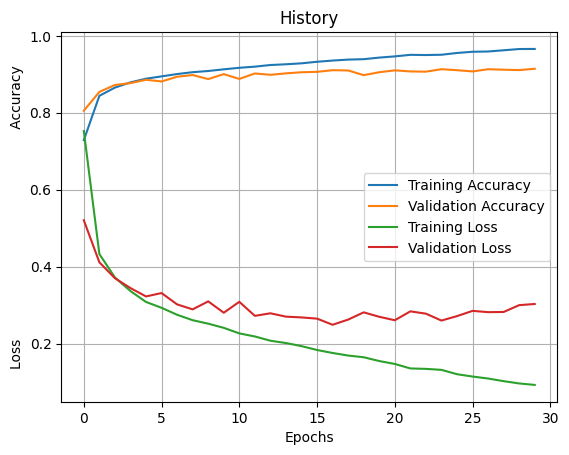

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss                                                Accuracy")
plt.title("History")
plt.grid()
plt.legend()
plt.show()

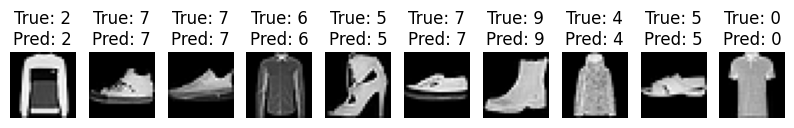

In [ ]:
import random

random_indices = random.sample(range(len(x_test)), 10)
test_image = x_test[random_indices]
test_labels = y_test[random_indices]

predict = model(test_image)
predict_labels = tf.argmax(predict, axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_image[i].reshape((28, 28)), cmap='gray')
    plt.title(f"True: {test_labels[i]}\nPred: {predict_labels[i]}")
    plt.axis('off')

Згорткова нейромережа показала кращі показники (loss: 0.0926 - accuracy: 0.9660 - val_loss: 0.3030 - val_accuracy: 0.9144) порівнянно з показниками точністі (loss: 0.2018 - accuracy: 0.9236 - val_loss: 0.3096 - val_accuracy: 0.8978) багатошарової мережі. Щоб підняти точність цієї нейромережі, мені довелося робити менше маніпуляцій порівняно з багатошаровою мережею.